In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
""" Extracting Training data """
Train_set = []
with open ('DS1_train.csv','r') as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split(',') 
        fl_lread = list(map(lambda x: float(x), lread))
        Train_set.append(fl_lread)
Train_set = np.array(Train_set)

In [31]:
""" Extracting Test data """
Test_set = []
with open ('DS1_test.csv','r') as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split(',') 
        fl_lread = list(map(lambda x: float(x), lread))
        Test_set.append(fl_lread)
Test_set = np.array(Test_set)

In [32]:
def DistanceCalc(Test_set, Train_set):
   
    for i in range(len(Test_set)):
        for j in range(len(Train_set)):
            distance[i, j] = np.sqrt(np.sum(np.power(Test_set[i,1:] - Train_set[j,1:], 2)))
    
    """ Sorting the Calculated Distance by Row in Ascending Order"""
    sorted_distance = np.argsort(distance)
    return(sorted_distance)

In [33]:
def KNearestNeighbor(Train_set, Test_set, k , sorted_distance):

    """ Extracting the Train Labels Corresponding to the K Lowest Distance"""
    Train_label = np.zeros([1200 , k])
    for i in range(len(sorted_distance)):
        for j in range(k):
            Train_label[i,j] = Train_set[int(sorted_distance[i,j]), 0]

    """ Predicting the Label """
    label_sum = []
    label_div = []
    label_predict = []

    for i in range(len(Train_label)):
        label_sum.append(np.sum(Train_label[i]))
        label_div.append(np.divide(np.array(label_sum[i]),k))
    label_predict = np.array(label_div)


    for i in range(len(label_predict)):
        if label_predict[i] > 0.5:
            label_predict[i] = 1
        else:
            label_predict[i] = 0

    return(label_predict)


In [34]:
def EvaluationMetrics(label_predict):
    
    """ Calculating Accuracy """
    temp = 0
    for i in range(len(label_predict)):
        if Test_set[i,0] == label_predict[i]:
            temp = temp +1
    accuracy = (temp/1200.)


    """ Calculating Precision """
    temp_tp = 0
    temp_fp = 0
    for i in range(len(label_predict)):
        if Test_set[i,0] == 1 and label_predict[i] == 1:
            temp_tp = temp_tp +1
        if Test_set[i,0] == 0 and label_predict[i] == 1:
            temp_fp = temp_fp +1

    precision = (temp_tp/(temp_tp + temp_fp))


    """ Calculating Recall """
    temp_fn = 0
    for i in range(len(label_predict)):
        if Test_set[i,0] == 1 and label_predict[i] == 0:
            temp_fn = temp_fn +1

    recall = (temp_tp/(temp_tp + temp_fn))


    """ Calculating F-Measure"""

    f_measure = 2*((precision * recall)/ (precision + recall))
    
    return(accuracy, precision, recall, f_measure)

In [38]:
distance = np.zeros([1200, 2800])
d = DistanceCalc(Test_set, Train_set)
neighbor = []
accuracy = []
for k in range(1,200):
    if(k%2!=0):
        l = KNearestNeighbor(Train_set, Test_set, k, d)
        a,p,r,f = EvaluationMetrics(l)
        neighbor.append(k)
        accuracy.append(a)
        print("k:", k, "Accuracy:", a*100, "Precision:", p*100, "Recall:", r*100, "F-Measure:", f*100 )
        print("\n")
        

k: 1 Accuracy: 52.75 Precision: 52.700490998363335 Recall: 53.666666666666664 F-Measure: 53.179190751445084


k: 3 Accuracy: 53.583333333333336 Precision: 53.47334410339257 Recall: 55.166666666666664 F-Measure: 54.30680885972109


k: 5 Accuracy: 55.25 Precision: 55.1219512195122 Recall: 56.49999999999999 F-Measure: 55.80246913580247


k: 7 Accuracy: 55.91666666666667 Precision: 55.867768595041326 Recall: 56.333333333333336 F-Measure: 56.099585062240656


k: 9 Accuracy: 55.58333333333333 Precision: 55.34290271132376 Recall: 57.833333333333336 F-Measure: 56.560717196414025


k: 11 Accuracy: 54.333333333333336 Precision: 54.153354632587856 Recall: 56.49999999999999 F-Measure: 55.301794453507334


k: 13 Accuracy: 55.75 Precision: 55.60975609756098 Recall: 56.99999999999999 F-Measure: 56.2962962962963


k: 15 Accuracy: 56.166666666666664 Precision: 55.92948717948718 Recall: 58.166666666666664 F-Measure: 57.02614379084968


k: 17 Accuracy: 55.50000000000001 Precision: 55.30546623794213 Recal



k: 151 Accuracy: 58.916666666666664 Precision: 59.11413969335605 Recall: 57.833333333333336 F-Measure: 58.46672283066555


k: 153 Accuracy: 58.75 Precision: 58.88324873096447 Recall: 57.99999999999999 F-Measure: 58.43828715365238


k: 155 Accuracy: 59.25 Precision: 59.359190556492415 Recall: 58.666666666666664 F-Measure: 59.01089689857501


k: 157 Accuracy: 59.25 Precision: 59.390862944162436 Recall: 58.5 F-Measure: 58.94206549118387


k: 159 Accuracy: 59.25 Precision: 59.32773109243698 Recall: 58.833333333333336 F-Measure: 59.079497907949786


k: 161 Accuracy: 58.58333333333333 Precision: 58.655462184873954 Recall: 58.166666666666664 F-Measure: 58.41004184100419


k: 163 Accuracy: 58.166666666666664 Precision: 58.333333333333336 Recall: 57.166666666666664 F-Measure: 57.744107744107744


k: 165 Accuracy: 58.75 Precision: 58.88324873096447 Recall: 57.99999999999999 F-Measure: 58.43828715365238


k: 167 Accuracy: 58.666666666666664 Precision: 58.78378378378378 Recall: 57.99999999999999

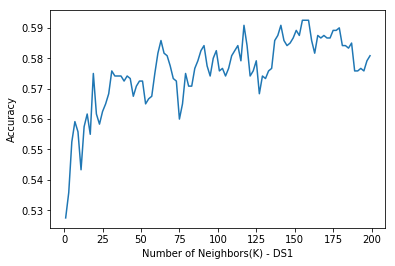

In [40]:
plt.plot(neighbor, accuracy)
plt.xlabel('Number of Neighbors(K) - DS1')
plt.ylabel('Accuracy')
plt.show()